In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../input/adult-income-dataset/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data preprocessing

In [5]:
df.replace('?',np.nan,inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
null_cols=['workclass','occupation','native-country']

### handle nulls values

In [8]:
#function to handle nulls in categorical columns by its class mode
def handle_null(df,cols):
    for col in cols:
        df[col] = df.groupby("income")[col].transform(lambda x: x.fillna(x.mode()[0]))
    return df

In [9]:
df=handle_null(df,null_cols)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### drop duplicated records

In [10]:
df=df.drop_duplicates() 

### Data normalization using z-score

In [11]:
from sklearn import preprocessing
numeric_cols=df.select_dtypes(include=[np.number]).columns
std=preprocessing.StandardScaler()
df[numeric_cols] = std.fit_transform(df[numeric_cols])

### Visualize correlation between columns

<AxesSubplot:>

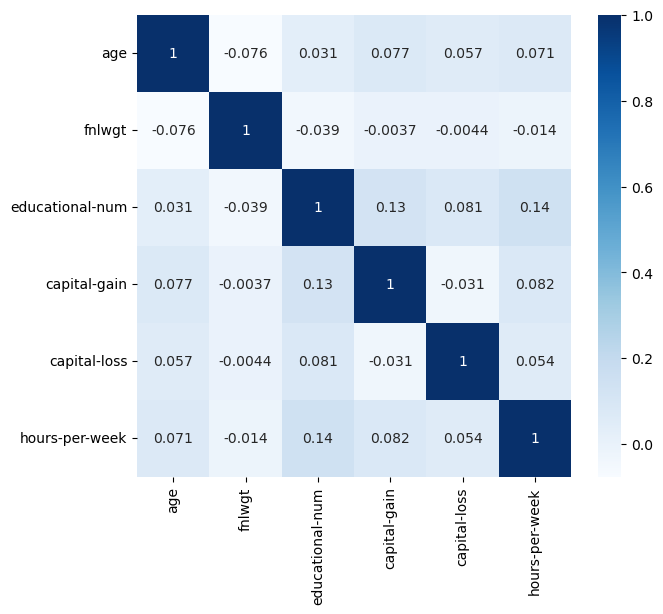

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

### convert categorical data to numerical

In [13]:
def handle_catg(df):
    cat_cols=df.select_dtypes(include=[object]).columns
    #convert column catagories to nums
    for col in cat_cols:
        df[col]=df[col].astype(str)
        col_vals=df[col].unique()
        if len(col_vals)==2:
            i=0
            for label in col_vals:
                df[col].replace(label,i,inplace=True)
                i+=1
    df=pd.get_dummies(df
               ,columns =df.select_dtypes(include=[object]).columns 
               ,drop_first = True
               )
    return df


In [14]:
df=handle_catg(df)
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995929,0.351583,-1.197969,0,-0.144884,-0.217251,-0.034367,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.047609,-0.945440,-0.419771,0,-0.144884,-0.217251,0.772558,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.777086,1.394491,0.747525,0,-0.144884,-0.217251,-0.034367,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390077,-0.277850,-0.030672,0,0.886245,-0.217251,-0.034367,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.506563,-0.815887,-0.030672,1,-0.144884,-0.217251,-0.841291,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### handle unbalance data


<AxesSubplot:>

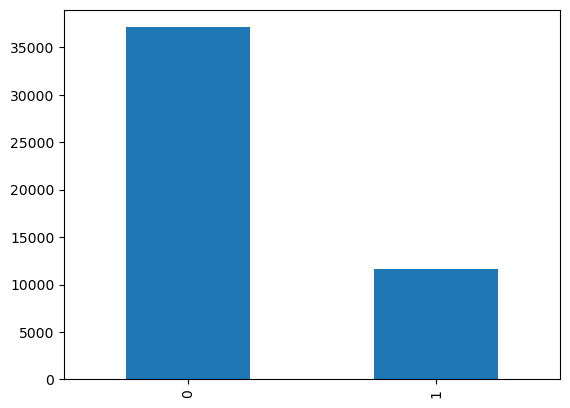

In [15]:
df['income'].value_counts().plot(kind='bar')

In [16]:
#class count
class_0_count,class_1_count=df['income'].value_counts()
print(f'class (<=50k) count is {class_0_count} and class (>50k) count is {class_1_count}')


class (<=50k) count is 37109 and class (>50k) count is 11680


Inference:
we can see that data is unbalanced and class (<=50k)(majority class) has more values than class (>50k)(minority class).


In [17]:
#divide by class
class_0=df[df['income']==0]
class_1=df[df['income']==1]

In [18]:
#rebalance data by oversampling the minority class (class_1)
class_1_oversampled=class_1.sample(class_0_count,replace=True)
class_1_oversampled.shape

(37109, 98)

In [19]:
#concating the oversampled class with the other class
df_oversampled=pd.concat([class_0,class_1_oversampled],axis=0)
df_oversampled.shape

(74218, 98)

<AxesSubplot:>

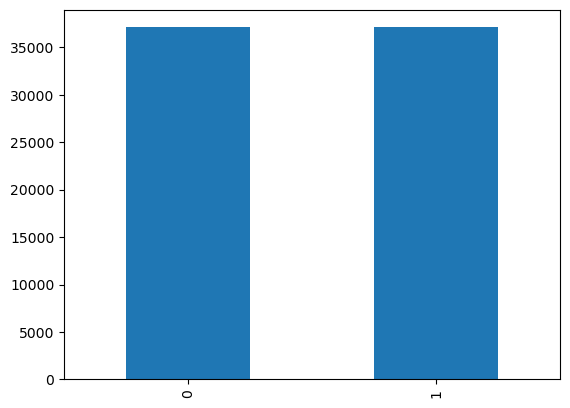

In [20]:
#visualize sentiment classes count after oversampling
df_oversampled['income'].value_counts().plot(kind='bar')

# Feature Reduction

In [21]:
#function for feature reduction based on highly correlated features
def corr_reduction(df,thresh):
    df_corr_mat=df.corr()
    correlated_features=set()
    for i in range(len(df_corr_mat.columns)):
        for j in range(i):
            if abs(df_corr_mat.iloc[i, j]) > thresh:
                print(df_corr_mat.columns[i]," ,is highly correlated with, ",df_corr_mat.columns[j])
                colname = df_corr_mat.columns[i]
                correlated_features.add(colname)
    
    df.drop(columns=correlated_features,axis=1,inplace=True)
    print(correlated_features,' are removed from data')


    return df

In [22]:
#feature reduction
print("the shape of data before feature reduction is: ",df.shape)
print("**************************************************************************")
df_red=corr_reduction(df,0.8)
print("**************************************************************************")

print("the shape of data after feature reduction is: ",df.shape)


the shape of data before feature reduction is:  (48789, 98)
**************************************************************************
set()  are removed from data
**************************************************************************
the shape of data after feature reduction is:  (48789, 98)


inference: there're no highly correlated columns in the data

# Feature Selection

In [23]:
# function for feature selection based on correlation with the target 

def corr_feature_selection(df,target_name,thresh):
    df_cor=pd.DataFrame(columns=['correlation with '+target_name])

    for col in df.columns:
        if col!=target_name:
            df_cor.loc[col]=abs(df[target_name].corr(df.loc[:,col]))

    df_cor.sort_values(by=['correlation with '+target_name],inplace=True,ascending=False)
    
    
    #feature selection based on correlation with target
    final_columns=[]
    for i in df_cor.index:
        if df_cor.loc[i,'correlation with '+target_name]>thresh:
            final_columns.append(i)
          
    final_columns.append(target_name)
    df=df.loc[:,final_columns]
    return df,df_cor

In [24]:
#feature selection based on correlation with target feature SalePrice

print("the shape of data before feature selection is: ",df.shape)
df_final,df_corr=corr_feature_selection(df,'income',0.05)
print("**************************************************************************")
print(df_corr.head())
print("**************************************************************************")
print(df_final.head())
print("**************************************************************************")
print("the shape of data after feature selection is: ",df_final.shape)

the shape of data before feature selection is:  (48789, 98)
**************************************************************************
                                   correlation with income
marital-status_Married-civ-spouse                 0.445644
educational-num                                   0.332829
marital-status_Never-married                      0.318499
occupation_Exec-managerial                        0.235720
age                                               0.230132
**************************************************************************
   marital-status_Married-civ-spouse  educational-num  \
0                                  0        -1.197969   
1                                  1        -0.419771   
2                                  1         0.747525   
3                                  1        -0.030672   
4                                  0        -0.030672   

   marital-status_Never-married  occupation_Exec-managerial       age  \
0                   

# Data splitting

In [25]:
from sklearn.model_selection import train_test_split

y=df_final['income'].values
X=df_final.drop(columns=['income'],axis=1).values

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.33)

# Machine Learning Model

In [26]:
#required models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import warnings
warnings.filterwarnings('ignore')


In [27]:
#datafrome to store models details
models_df=pd.DataFrame(columns=['train_acc','test_acc','f1-score'])

In [28]:
#function to train and evaluate models
def train_model(model_name,model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    #train model on train data
    model.fit(X_train,y_train)
    
    #prediction over trian data
    y_train_pred = model.predict(X_train)
    
    #prediction over test data
    y_test_pred = model.predict(X_test)
    
    #train accuracy using accuracy score metric
    train_acc=round(accuracy_score(y_train,y_train_pred),2)*100
    print("training accuracy = ",train_acc)

    
    #test accuracy using accuracy score metric
    test_acc=round(accuracy_score(y_test,y_test_pred),2)*100
    print("testing accuracy = ",test_acc)
    
    #f1-score
    f1_s=round(f1_score(y_test, y_test_pred),2)*100
    print("f1-score = ",f1_s)

    #evaluate model using confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
    plt.show()
    print(classification_report(y_test,y_test_pred))
    
    #adding the model details to models data frame
    models_df.loc[model_name]=[train_acc,test_acc,f1_s]

# KNN Model

training accuracy =  84.0
testing accuracy =  84.0
f1-score =  63.0


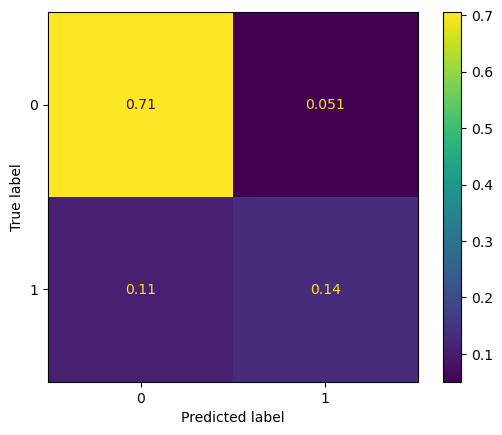

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12178
           1       0.73      0.55      0.63      3923

    accuracy                           0.84     16101
   macro avg       0.80      0.74      0.76     16101
weighted avg       0.83      0.84      0.83     16101



In [29]:
kn=KNeighborsClassifier(n_neighbors=int(len(X_train)**0.5))
train_model('KNeighborsClassifie',kn)

# support vector machine Model

training accuracy =  86.0
testing accuracy =  86.0
f1-score =  67.0


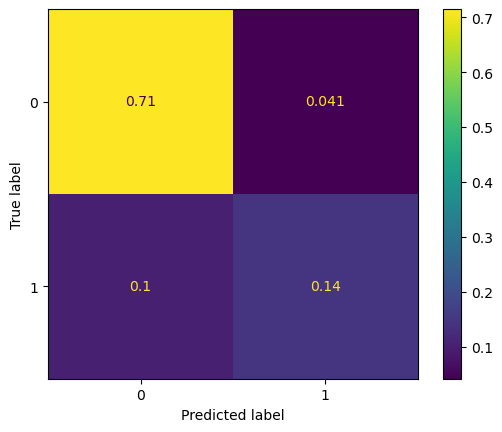

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12178
           1       0.78      0.59      0.67      3923

    accuracy                           0.86     16101
   macro avg       0.83      0.77      0.79     16101
weighted avg       0.85      0.86      0.85     16101



In [30]:
svc=SVC()
train_model('SVC',svc)

# Logistic Regression Model

training accuracy =  85.0
testing accuracy =  85.0
f1-score =  66.0


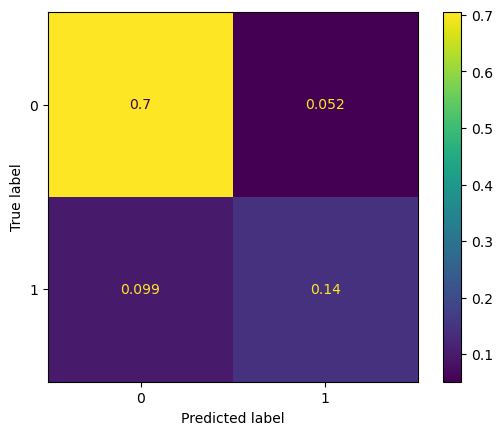

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12178
           1       0.74      0.59      0.66      3923

    accuracy                           0.85     16101
   macro avg       0.81      0.76      0.78     16101
weighted avg       0.84      0.85      0.84     16101



In [31]:
lr=LogisticRegression()
train_model('logistic regression',lr)

# Comparing Models Performance

In [32]:
models_df.sort_values(by='test_acc',ascending=False,inplace=True)
models_df

,train_acc,test_acc,f1-score
SVC,86.0,86.0,67.0
logistic regression,85.0,85.0,66.0
KNeighborsClassifie,84.0,84.0,63.0
